In [9]:
%pip install ultralytics kagglehub wandb albumentations opencv-python

Note: you may need to restart the kernel to use updated packages.


In [10]:
!mkdir -p ~/.kaggle
!mv /home/klamban/ppe-deteciton-project/kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

mv: cannot stat '/home/klamban/ppe-deteciton-project/kaggle.json': No such file or directory


In [11]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kittipodlambangchang/ppe-detection-image-project")

print("Path to dataset files:", path)

Path to dataset files: /home/klamban/.cache/kagglehub/datasets/kittipodlambangchang/ppe-detection-image-project/versions/1


In [ ]:
import yaml
import os

path = "/home/klamban/.cache/kagglehub/datasets/kittipodlambangchang/ppe-detection-image-project/versions/1"

config = {
    "train": f"{path}/train_aug/images",
    "val": f"{path}/valid/images",
    "test": f"{path}/test/images",
    "nc": 11,
    "names": [
        "Gloves",
        "Goggles",
        "Hardhat",
        "Mask",
        "NO-Gloves",
        "NO-Goggles",
        "NO-Hardhat",
        "NO-Mask",
        "NO-Safety Vest",
        "Person",
        "Safety Vest",
    ],
}

save_path = os.path.join("/home/klamban/ppe-yolo-train", "config.yaml")
with open(save_path, "w") as f:
    yaml.dump(config, f, default_flow_style=False)

print("Saved config.yaml to:", os.path.abspath(save_path))


Saved config.yaml to: /home/klamban/ppe-yolo-train/config.yaml


In [30]:
!yolo settings wandb=True

✅ Updated 'wandb=True'
JSONDict("/home/klamban/.config/Ultralytics/settings.json"):
{
  "settings_version": "0.0.6",
  "datasets_dir": "/home/klamban/datasets",
  "weights_dir": "weights",
  "runs_dir": "runs",
  "uuid": "677562d2014e94fb0878dbb143cb7a240893b4b537fe264b0f4d57597b124180",
  "sync": true,
  "api_key": "",
  "openai_api_key": "",
  "clearml": true,
  "comet": true,
  "dvc": true,
  "hub": true,
  "mlflow": true,
  "neptune": true,
  "raytune": true,
  "tensorboard": false,
  "wandb": true,
  "vscode_msg": true,
  "openvino_msg": true
}
💡 Learn more about Ultralytics Settings at https://docs.ultralytics.com/quickstart/#ultralytics-settings


In [31]:
import wandb
import os
os.environ['WANDB_API_KEY'] = 'c7c1481bd47886cb1e195b3c538df89af9a716cd'

wandb.login()

wandb.init(project="Image-Project", name="yolov8_run", job_type="train")


wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


In [32]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")

In [33]:
results = model.train(
    data="/home/klamban/ppe-yolo-train/config.yaml",
    epochs=100,
    imgsz=640,
    project="ppe-detection",
    name="yolov8n-ppe",
)

Ultralytics 8.3.203 🚀 Python-3.13.5 torch-2.8.0+cu128 CUDA:0 (NVIDIA A100-SXM4-40GB, 40339MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/home/klamban/ppe-yolo-train/config.yaml, degrees=0.0, deterministic=True, device=0,1, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8n-ppe8, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, pers

  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  8                  -1  1    460288  ultralytics.nn.modules.block.C2f             [256, 256, 1, True]           
  9                  -1  1    164608  ultralytics.nn.modules.block.SPPF            [256, 256, 5]                 
 10                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None

wandb: Currently logged in as: kitton to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
wandb: creating run
wandb: Tracking run with wandb version 0.22.0
wandb: Run data is saved locally in /home/klamban/wandb/run-20250928_211330-n1dzlsio
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run yolov8n-ppe8
wandb: ⭐️ View project at https://wandb.ai/kitton/PPE-Detection
wandb: 🚀 View run at https://wandb.ai/kitton/PPE-Detection/runs/n1dzlsio


Overriding model.yaml nc=80 with nc=11
Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...
AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 274.8±230.9 MB/s, size: 123.2 KB)
train: Scanning /home/klamban/.cache/kagglehub/datasets/kittipodlambangchang/ppe-detection-image-project/versions/1/train_aug/labels.cache... 30765 images, 5291 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 30765/30765 93.2Mit/s 0.0s
train: /home/klamban/.cache/kagglehub/datasets/kittipodlambangchang/ppe-detection-image-project/versions/1/train_aug/images/28500.jpg: 1 duplicate labels removed
train: /home/klamban/.cache/kagglehub/datasets/kittipodlambangchang/ppe-detection-image-project/versions/1/train_aug/images/28656.jpg: 1 duplicate labels removed
train: /home/klamban/.cache/kagglehub/datasets/kittipodlambangchang/ppe-detection-image-project/versions/1/train_aug/images/28710.jpg: 1 duplicate labels

wandb: uploading artifact run_n1dzlsio_model; updating run metadata; uploading artifact run-n1dzlsio-curvesF1-ConfidenceB_table-Vx4Tew; uploading artifact run-n1dzlsio-curvesPrecision-ConfidenceB_table-Ox3xsw; uploading artifact run-n1dzlsio-curvesRecall-ConfidenceB_table-O2vHrw
wandb: uploading artifact run_n1dzlsio_model; uploading artifact run-n1dzlsio-curvesPrecision-ConfidenceB_table-Ox3xsw; uploading artifact run-n1dzlsio-curvesRecall-ConfidenceB_table-O2vHrw; uploading output.log; uploading wandb-summary.json
wandb: uploading artifact run_n1dzlsio_model; uploading artifact run-n1dzlsio-curvesRecall-ConfidenceB_table-O2vHrw
wandb: uploading history steps 99-99, summary, console lines 532-545
wandb: 
wandb: Run history:
wandb:                  lr/pg0 ▃████▇▇▇▇▇▇▆▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▁▁▁
wandb:                  lr/pg1 ▃▆███▇▇▇▇▇▇▇▆▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▂▂▂▂▂▂▂▁
wandb:                  lr/pg2 ▆████▇▇▇▇▇▇▇▆▆▆▆▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▃▃▂▂▂▂▁▁
wandb:        metrics/mAP50(B) ▁▂▂▃▄▅▅▆▆▇▇▇▇▇▇▇▇▇

In [39]:
model = YOLO("/home/klamban/ppe-detection/yolov8n-ppe8/weights/best.pt")

In [40]:
base_path = "/home/klamban/.cache/kagglehub/datasets/kittipodlambangchang/ppe-detection-image-project/versions/1"
test_img_dir = os.path.join(base_path, "test/images")
test_label_dir = os.path.join(base_path, "test/labels")

In [41]:
import random

all_images = [f for f in os.listdir(test_img_dir) if f.endswith((".jpg", ".png"))]
sample_images = random.sample(all_images, 10)


In [45]:
yaml_path = os.path.join("/home/klamban/ppe-yolo-train", "config.yaml") 


with open(yaml_path, "r") as f:
    config = yaml.safe_load(f)

class_names = config["names"]



image 1/1 /home/klamban/.cache/kagglehub/datasets/kittipodlambangchang/ppe-detection-image-project/versions/1/test/images/2893.jpg: 640x640 4 Glovess, 2 NO-Glovess, 867.2ms
Speed: 793.7ms preprocess, 867.2ms inference, 348.1ms postprocess per image at shape (1, 3, 640, 640)


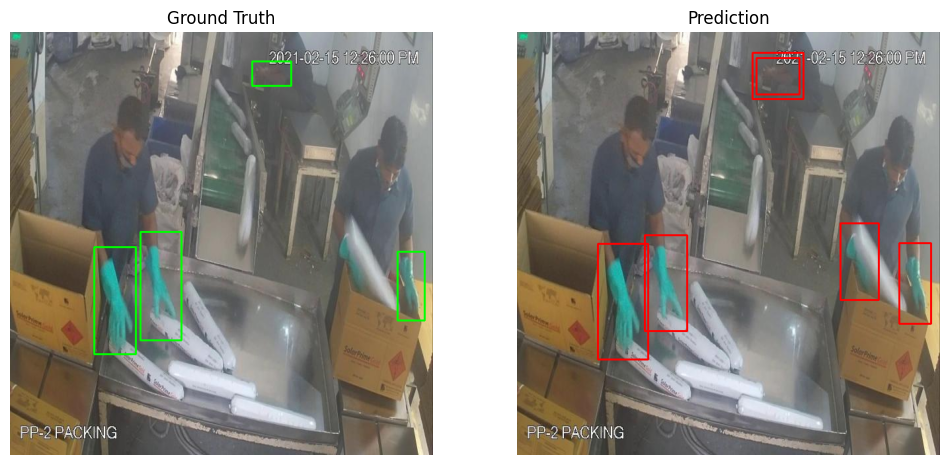


image 1/1 /home/klamban/.cache/kagglehub/datasets/kittipodlambangchang/ppe-detection-image-project/versions/1/test/images/1688.jpg: 640x640 1 Mask, 5.3ms
Speed: 1.2ms preprocess, 5.3ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


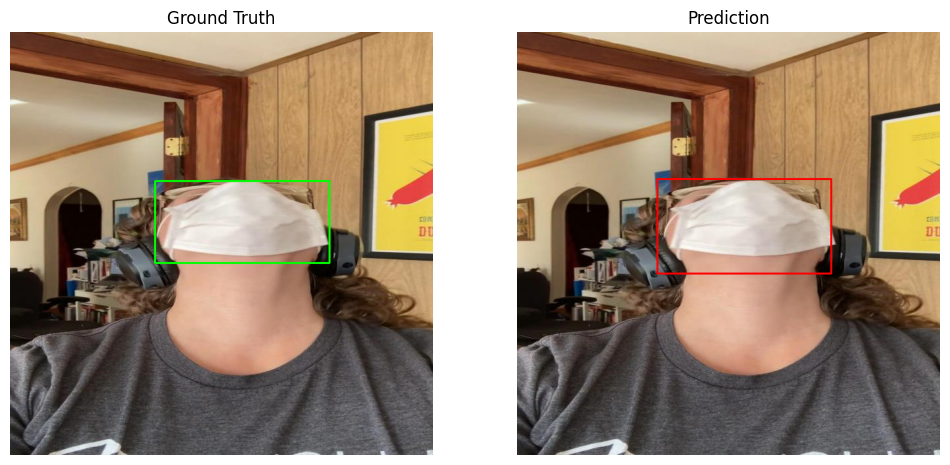


image 1/1 /home/klamban/.cache/kagglehub/datasets/kittipodlambangchang/ppe-detection-image-project/versions/1/test/images/2710.jpg: 640x640 4 NO-Hardhats, 5.3ms
Speed: 1.2ms preprocess, 5.3ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)


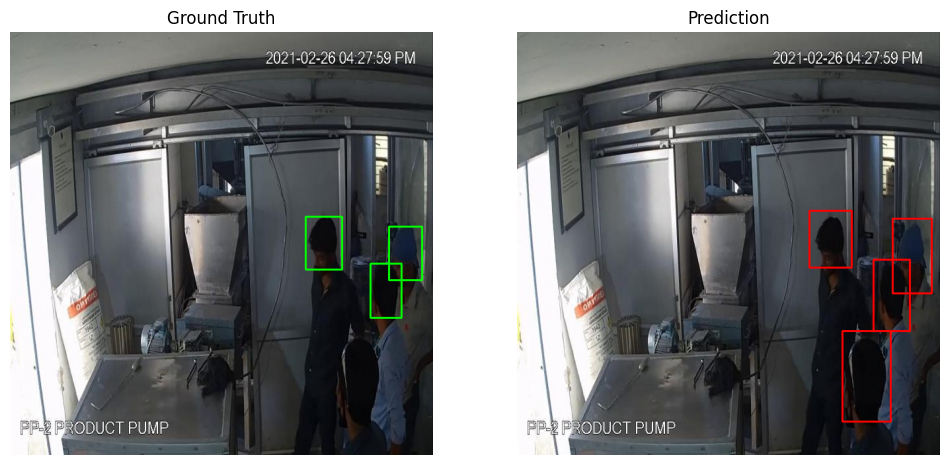


image 1/1 /home/klamban/.cache/kagglehub/datasets/kittipodlambangchang/ppe-detection-image-project/versions/1/test/images/1964.jpg: 640x640 2 Glovess, 2 NO-Glovess, 5.3ms
Speed: 1.2ms preprocess, 5.3ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)


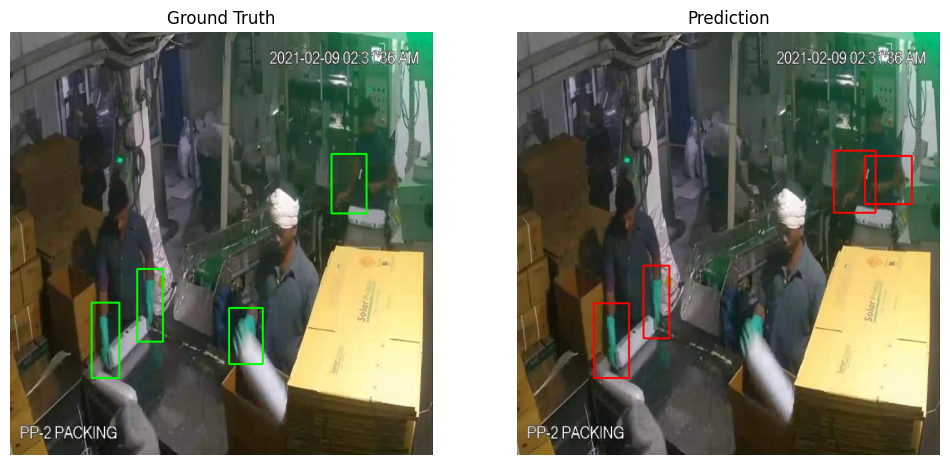


image 1/1 /home/klamban/.cache/kagglehub/datasets/kittipodlambangchang/ppe-detection-image-project/versions/1/test/images/1947.jpg: 640x640 2 Glovess, 5.3ms
Speed: 1.2ms preprocess, 5.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


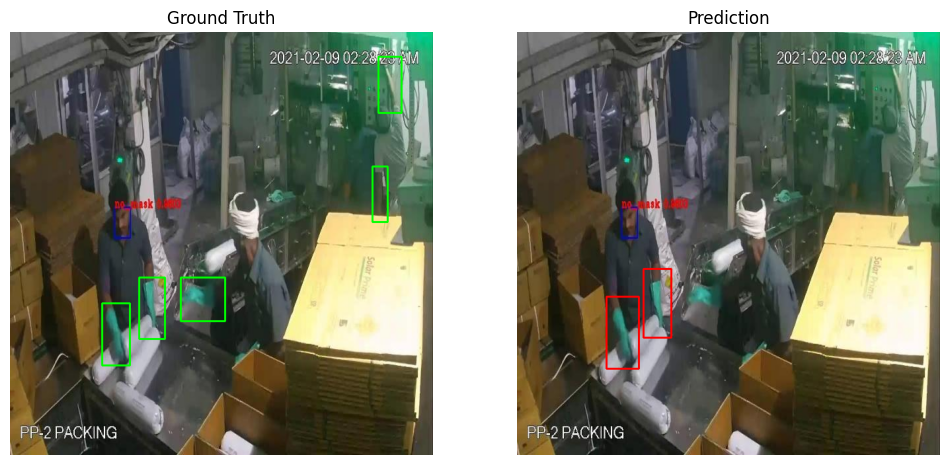


image 1/1 /home/klamban/.cache/kagglehub/datasets/kittipodlambangchang/ppe-detection-image-project/versions/1/test/images/0461.jpg: 640x640 2 Hardhats, 5.3ms
Speed: 1.2ms preprocess, 5.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


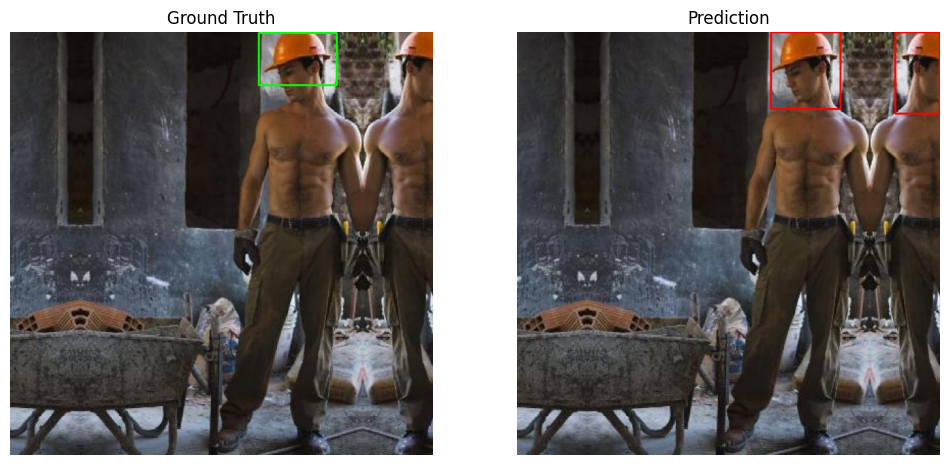


image 1/1 /home/klamban/.cache/kagglehub/datasets/kittipodlambangchang/ppe-detection-image-project/versions/1/test/images/1498.jpg: 640x640 2 Masks, 6 NO-Hardhats, 5.3ms
Speed: 1.2ms preprocess, 5.3ms inference, 3.9ms postprocess per image at shape (1, 3, 640, 640)


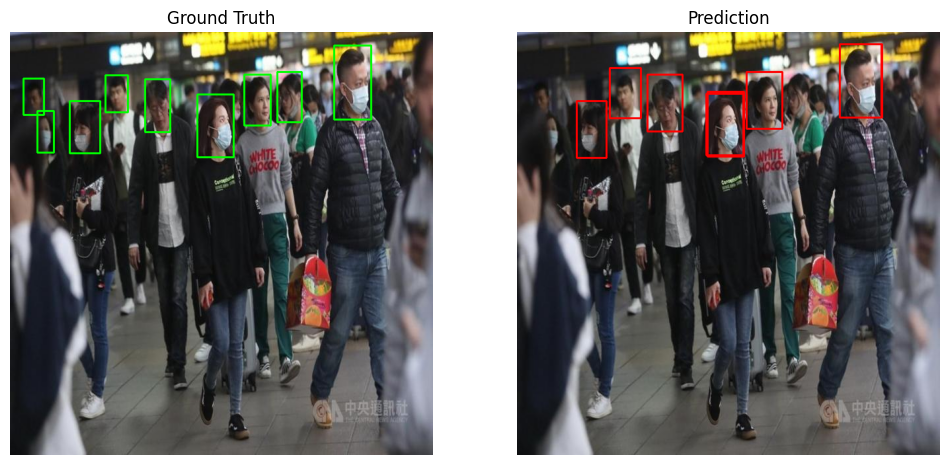


image 1/1 /home/klamban/.cache/kagglehub/datasets/kittipodlambangchang/ppe-detection-image-project/versions/1/test/images/1506.jpg: 640x640 4 Masks, 5.3ms
Speed: 1.2ms preprocess, 5.3ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


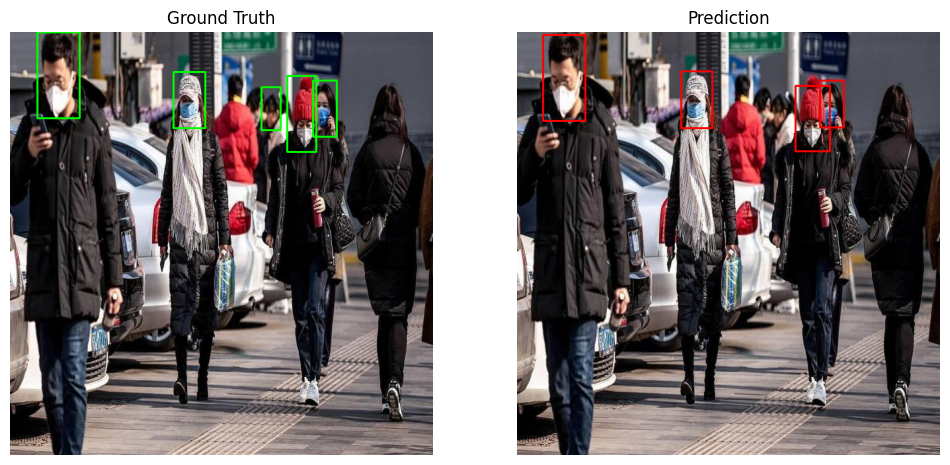


image 1/1 /home/klamban/.cache/kagglehub/datasets/kittipodlambangchang/ppe-detection-image-project/versions/1/test/images/3511.jpg: 640x640 2 Goggless, 5.3ms
Speed: 1.2ms preprocess, 5.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


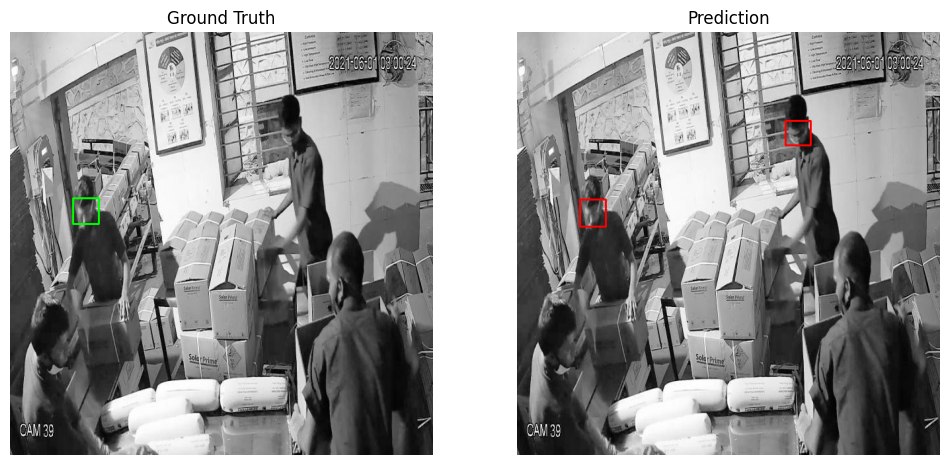


image 1/1 /home/klamban/.cache/kagglehub/datasets/kittipodlambangchang/ppe-detection-image-project/versions/1/test/images/2365.jpg: 640x640 (no detections), 5.3ms
Speed: 1.2ms preprocess, 5.3ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


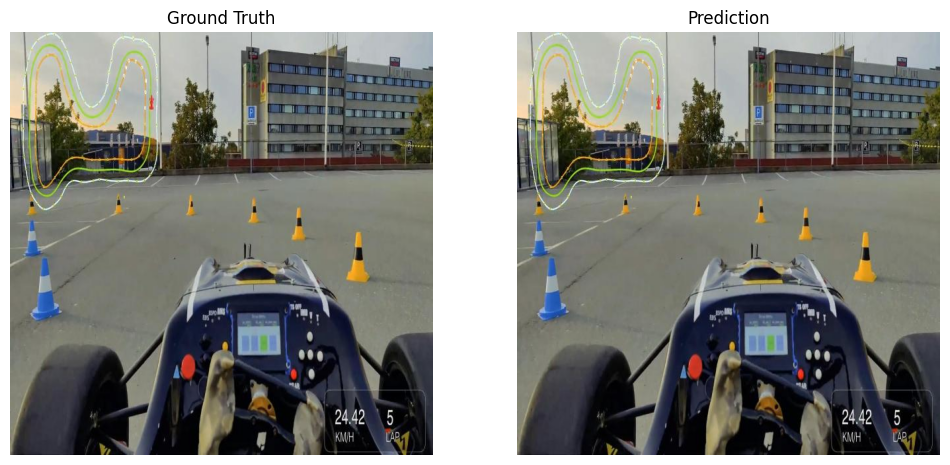

In [46]:
import cv2
import matplotlib.pyplot as plt

for img_name in sample_images:
    img_path = os.path.join(test_img_dir, img_name)
    label_path = os.path.join(test_label_dir, os.path.splitext(img_name)[0] + ".txt")

    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    gt_img = img_rgb.copy()
    if os.path.exists(label_path):
        with open(label_path, "r") as f:
            for line in f.readlines():
                cls, x, y, w, h = map(float, line.strip().split())
                h_img, w_img, _ = gt_img.shape
                x1 = int((x - w / 2) * w_img)
                y1 = int((y - h / 2) * h_img)
                x2 = int((x + w / 2) * w_img)
                y2 = int((y + h / 2) * h_img)
                cv2.rectangle(gt_img, (x1, y1), (x2, y2), (0, 255, 0), 2)
    results = model(img_path, imgsz=640, conf=0.25)
    pred_img = img_rgb.copy()
    for r in results:
        boxes = r.boxes.xyxy.cpu().numpy()
        for box in boxes:
            x1, y1, x2, y2 = map(int, box)
            cv2.rectangle(
                pred_img, (x1, y1), (x2, y2), (255, 0, 0), 2
            )  # แดง = Prediction

    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    axs[0].imshow(gt_img)
    axs[0].set_title("Ground Truth")
    axs[0].axis("off")

    axs[1].imshow(pred_img)
    axs[1].set_title("Prediction")
    axs[1].axis("off")

    plt.show()

In [47]:
%pip install YOLOv8-Explainer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 37.9 MB/s eta 0:00:000:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for grad-cam: filename=grad_cam-1.4.8-py3-none-any.whl size=38341 sha256=05bd8d6f6b8707833cc16661691d27dcd123eda4af3cd2e326c6119be3596524
  Stored in directory: /home/klamban/.cache/pip/wheels/c5/f5/61/b82fdd6bae217848010620836b8fd70620dcadb99933ed77cd
Successfully built grad-cam
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [YOLOv8-Explainer]1/3 [grad-cam]
Note: you may need to restart the kernel to use updated packages.
